In [1]:
import geopandas as gpd # read and clip
import os
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
!pip install pygris
import pygris # pygris is a Python package to help users access US Census Bureau TIGER/Line and cartographic boundary shapefiles and load them into Python as GeoDataFrames.
!pip install Cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# This will prompt you to authorize Google Colab to access your Google Drive.
drive.mount('/content/drive')
from datetime import datetime
print(datetime.now().strftime("%H:%M:%S"))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 117.7 MB/s eta 0:00:00
Mounted at /content/drive
16:22:46


In [2]:
# Define the path to your Shapefile.
# The path must be relative to the mounted Google Drive.
file_path = "/content/drive/MyDrive/NHDPlusPN/NHDPlus17/NHDSnapshot/Hydrography/NHDFlowline.shp"

# Check if the file exists before attempting to read it.
if os.path.exists(file_path):
    try:
        # Read the Shapefile into a GeoDataFrame
        nhd_flowlines = gpd.read_file(file_path)

        # Print the first 5 rows to verify it loaded correctly
        print(nhd_flowlines.head())
        print("\nShapefile loaded successfully!")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
else:
    print(f"Error: The file '{file_path}' does not exist.")


/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(


      COMID      FDATE RESOLUTION GNIS_ID GNIS_NAME  LENGTHKM       REACHCODE  \
0   9301535 1999-10-08     Medium    None      None     0.999  09040002011583   
1  22968128 2001-03-02     Medium    None      None     0.134  10030104009812   
2  22968138 2001-03-02     Medium    None      None     0.217  10030104009813   
3  23135995 2001-02-07     Medium    None      None     0.916  16010102003533   
4  23135997 2001-02-07     Medium    None      None     1.865  16010102003534   

         FLOWDIR  WBAREACOMI        FTYPE  FCODE  SHAPE_LENG ENABLED  \
0  Uninitialized           0  StreamRiver  46006    0.011661    True   
1  Uninitialized           0  StreamRiver  46003    0.001671    True   
2  Uninitialized           0  StreamRiver  46003    0.002145    True   
3  Uninitialized           0  StreamRiver  46003    0.010671    True   
4  Uninitialized           0  StreamRiver  46003    0.019193    True   

   GNIS_NBR                                           geometry  
0         0  LI

In [3]:
df_path = "/content/drive/MyDrive/NHDPlusPN/NHDPlus17/NHDPlusAttributes/PlusFlowlineVAA.dbf"

# Read DBF directly
df = gpd.read_file( df_path)

# Convert to pandas DataFrame (optional)
df = pd.DataFrame(df)

print(df.head())
print(df.columns)

        ComID      Fdate  StreamLeve  StreamOrde  StreamCalc    FromNode  \
0  22904955.0 2012-07-02         4.0         2.0         2.0  50002448.0   
1  22904959.0 2012-07-02         4.0         2.0         2.0  50002450.0   
2  22904961.0 2012-07-02         5.0         1.0         1.0  50143460.0   
3  22904965.0 2012-07-02         3.0         3.0         3.0  50002452.0   
4  22904963.0 2012-07-02         3.0         3.0         3.0  50002451.0   

       ToNode    Hydroseq  LevelPathI  Pathlength  ...  DivEffect  VPUIn  \
0  50002447.0  50064512.0  50055234.0    1212.961  ...        0.0    0.0   
1  50002449.0  50079322.0  50055234.0    1217.494  ...        0.0    0.0   
2  50002450.0  50231243.0  50231243.0    1217.577  ...        0.0    0.0   
3  50002451.0  50048700.0  50046093.0    1206.711  ...        0.0    0.0   
4  50002272.0  50046093.0  50046093.0    1206.647  ...        0.0    0.0   

   VPUOut  AreaSqKM  TotDASqKM  DivDASqKM  Tidal     TOTMA   WBAreaType  \
0     0.0  

In [4]:
# Rename the 'COMID' column in nhd_flowlines to 'ComID' to match the df dataframe
nhd_flowlines = nhd_flowlines.rename(columns={'COMID': 'ComID'})

merged_gdf = nhd_flowlines.merge(df, on='ComID', how='left')

print(merged_gdf)

           ComID      FDATE RESOLUTION  GNIS_ID               GNIS_NAME  \
0        9301535 1999-10-08     Medium     None                    None   
1       22968128 2001-03-02     Medium     None                    None   
2       22968138 2001-03-02     Medium     None                    None   
3       23135995 2001-02-07     Medium     None                    None   
4       23135997 2001-02-07     Medium     None                    None   
...          ...        ...        ...      ...                     ...   
272335  24545039 2005-08-27     Medium     None                    None   
272336  24545041 2005-08-27     Medium     None                    None   
272337  23706720 2001-02-28     Medium     None                    None   
272338  23931942 2001-03-14     Medium  1127294  South Fork Keene Creek   
272339  24279568 2001-04-17     Medium  1503026          Anderson Creek   

        LENGTHKM       REACHCODE         FLOWDIR  WBAREACOMI        FTYPE  \
0          0.999  0904

In [5]:
merged_gdf['StreamOrde'].unique()

array([nan,  2.,  6.,  3.,  1.,  4.,  5.,  7.,  8.,  9., -9.])

FieldError: Error adding field 'Fdate' to layer

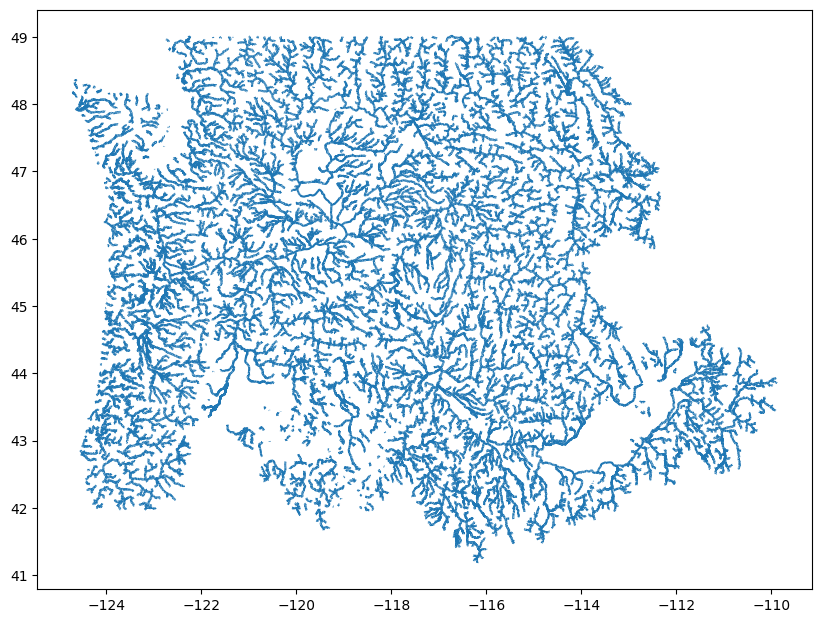

In [6]:
merged_gdf_order = merged_gdf[merged_gdf['StreamOrde'].isin([3,4,5,6,7,8,9])]#.plot(figsize=(10, 10))

merged_gdf_order.plot(figsize=(10, 10))

# Save as shapefile
#merged_gdf_order.to_file("merged_gdf_order.shp", driver="ESRI Shapefile")
merged_gdf_order.to_file("merged_gdf_order.gpkg", driver="GPKG")

#plt.show()


only for plotting

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242

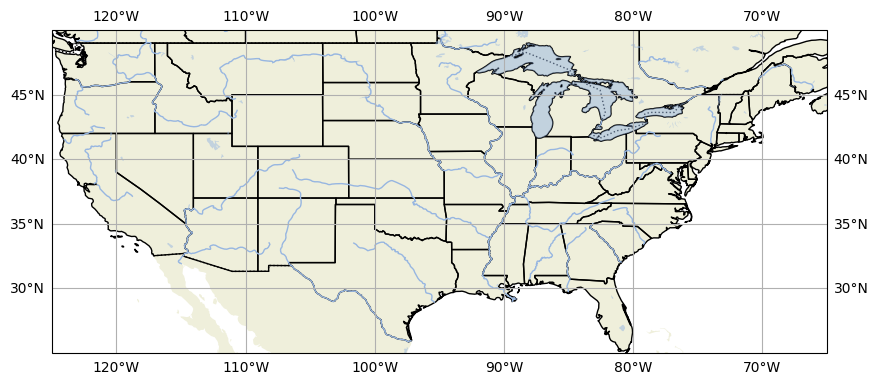

In [7]:



# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the map (e.g., to focus on the contiguous US)
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())

# Add built-in features for a base map
ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':') # Country borders

# Add US state boundaries using cartopy.feature.STATES
# This feature is specifically for first-order administrative boundaries within the US.
ax.add_feature(cfeature.STATES, edgecolor='black')

# Add other features like lakes and rivers for context
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add gridlines for latitude and longitude
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Display the map
plt.show()

Using the default year of 2024
<class 'geopandas.geodataframe.GeoDataFrame'>


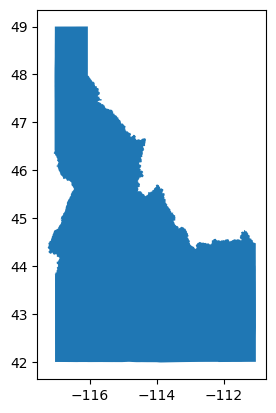

In [10]:



# Get all states
states = pygris.states(cb=True)  # cb=True gives a simplified version
#print(type(states))
#states.plot()
# Subset to Idaho
idaho = states[states.NAME == "Idaho"]
print(type(idaho))

# Plot
idaho.plot()

idaho.to_file("idaho.gpkg", driver="GPKG")
# Save as KML
idaho.to_file("idaho.kml", driver="KML")

In [ ]:
# --- 3. Perform the clip operation using gpd.clip() ---
# The gpd.clip() function is the recommended way to perform this operation.
# It takes two arguments:
# 1. The GeoDataFrame to be clipped (streams_gdf)
# 2. The GeoDataFrame used as the clipping boundary (boundary_gdf)

try:
    merged_gdf_order_idaho =  gpd.clip( merged_gdf_order,  idaho )

    #print("Clipped GeoDataFrame:")
    print( merged_gdf_order_idaho )
   # print("\nClipped GeoDataFrame (re-indexed with new geometry):")
    # To show the new geometries, let's print the WKT (Well-Known Text)
    # The output will show that the first stream is now a MultiLineString
    # and the second stream has been dropped entirely.
    #print( merged_gdf_order_idaho.to_wkt())
    merged_gdf_order_idaho.plot(figsize=(10, 10))
    print( merged_gdf_order_idaho.crs)
    merged_gdf_order_idaho.to_file("merged_gdf_order_idaho.gpkg", driver="GPKG")
    merged_gdf_order_idaho.to_file('merged_gdf_order_idaho.shp', driver='ESRI Shapefile')

    #
except Exception as e:
    print(f"An error occurred during clipping: {e}")

16

In [ ]:


file_path_16 = "/content/drive/MyDrive/NHDPlusPN/NHDPlus16/NHDSnapshot/Hydrography/NHDFlowline.shp"

# Check if the file exists before attempting to read it.
if os.path.exists(file_path_16):
    try:
        # Read the Shapefile into a GeoDataFrame
        nhd_flowlines_16 = gpd.read_file(file_path_16)

        # Print the first 5 rows to verify it loaded correctly
        print(nhd_flowlines_16.head())
        print("\nShapefile loaded successfully!")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
else:
    print(f"Error: The file '{file_path_16}' does not exist.")

In [ ]:
df_path_16 = "/content/drive/MyDrive/NHDPlusPN/NHDPlus16/NHDPlusAttributes/PlusFlowlineVAA.dbf"

# Read DBF directly
df_16 = gpd.read_file( df_path_16 )

# Convert to pandas DataFrame (optional)
df_16 = pd.DataFrame(df_16)

print(df_16.head())
print(df_16.columns)

In [ ]:
nhd_flowlines_16 = nhd_flowlines_16.rename(columns={'COMID': 'ComID'})

merged_gdf_16 = nhd_flowlines_16.merge(df_16, on='ComID', how='left')

print(merged_gdf_16)

In [ ]:
merged_gdf_16[merged_gdf_16['StreamOrde'].isin([3,4,5,6,7,8,9])].plot(figsize=(10, 10))
plt.show()